In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [35]:
df = pd.read_csv('thyroiddataset.csv')
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [36]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [38]:
print(df.isnull().sum())

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


### Observations
* There are no missing values in the dataset 

* Since almost all the features are object types (categorical), we need to convert them to numerical values so machine learning models can work with them.

In [39]:
print(df.columns.tolist()) 

['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']


### One-Hot Encoding

In [40]:
# Target column to binary
df['Recurred'] = df['Recurred'].map({'No': 0, 'Yes': 1})

In [41]:
# 🧠 5. Encode all categorical columns
categorical_cols = [
    'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function',
    'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk',
    'T', 'N', 'M', 'Stage', 'Response'
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [42]:
# Features and target split
X = df_encoded.drop('Recurred', axis=1)
y = df_encoded['Recurred']

In [43]:
print(" Columns in df:", df.columns.tolist())
print(" Data snapshot:\n", df.head())

 Columns in df: ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']
 Data snapshot:
    Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right     

### Balance the Dataset with SMOTE

In [17]:
pip install -U scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [44]:
# Fix imbalance using SMOTE
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

In [46]:
# Check original distribution
print("Original class distribution:")
print(y.value_counts())

# Check resampled distribution
print("\nResampled class distribution:")
print(pd.Series(y_res).value_counts())

Original class distribution:
Recurred
0    275
1    108
Name: count, dtype: int64

Resampled class distribution:
Recurred
0    275
1    275
Name: count, dtype: int64


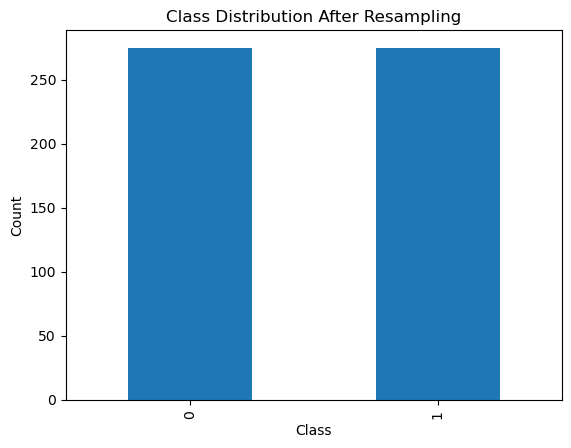

In [47]:
import matplotlib.pyplot as plt

pd.Series(y_res).value_counts().plot(kind='bar')
plt.title('Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [48]:
print("Resampled class distribution:")
print(pd.Series(y_res).value_counts())

Resampled class distribution:
Recurred
0    275
1    275
Name: count, dtype: int64


### Train and Predict

In [49]:
from sklearn.model_selection import train_test_split

# Split the balanced data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Train your model 
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.98      1.00      0.99        55

    accuracy                           0.99       110
   macro avg       0.99      0.99      0.99       110
weighted avg       0.99      0.99      0.99       110

[[54  1]
 [ 0 55]]


### Cross-validation

In [63]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_res, y_res, cv=skf, scoring='f1')
print("Cross-validated F1 scores:", scores)
print("Mean F1:", scores.mean())

Cross-validated F1 scores: [1.         0.97297297 0.98181818 0.98214286 0.99099099]
Mean F1: 0.9855850005850005


### Feature Importances

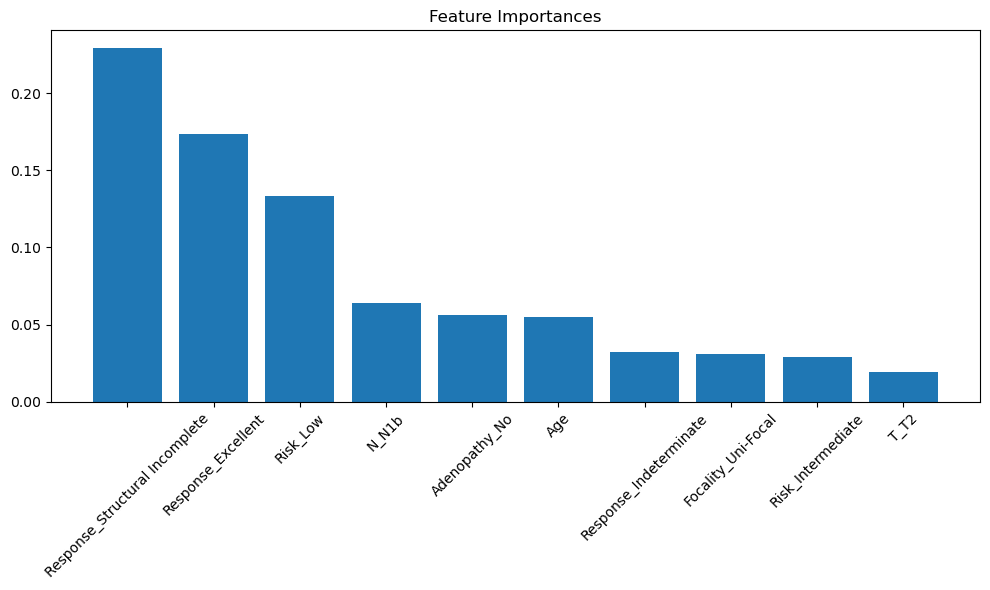

In [52]:
import matplotlib.pyplot as plt
import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(10), importances[indices][:10], align="center")
plt.xticks(range(10), [features[i] for i in indices[:10]], rotation=45)
plt.tight_layout()
plt.show()


### ROC-AUC Score

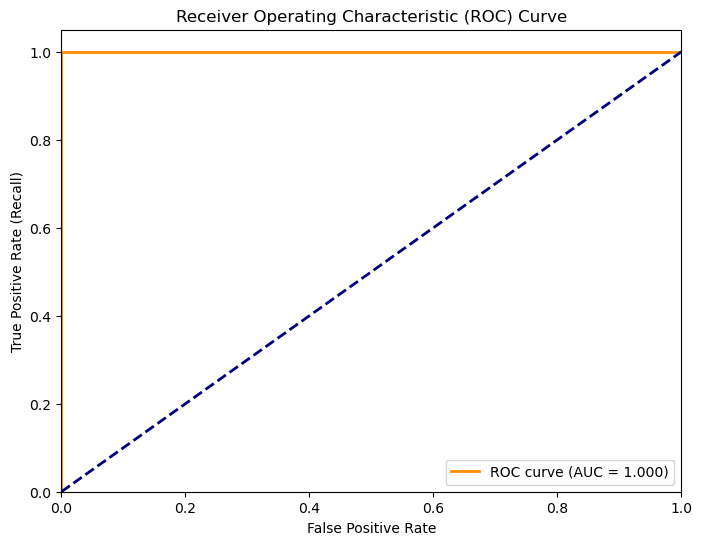

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming clf is your trained classifier and X_test, y_test are your test data
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

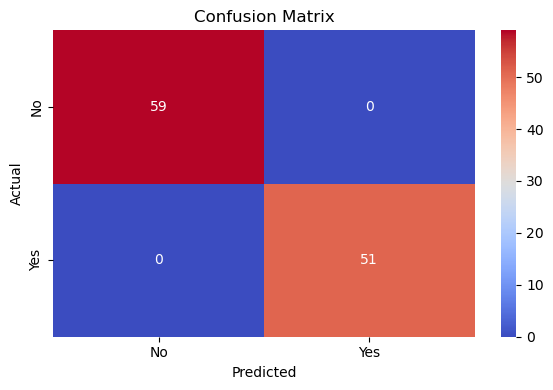

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Simulated values based on your scenario
y_true = [0]*59 + [1]*51  # 59 "No", 51 "Yes"
y_pred = [0]*59 + [1]*51  # Perfect prediction

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm',xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [60]:
import pandas as pd
print(pd.Series(y_res).value_counts())

Recurred
0    275
1    275
Name: count, dtype: int64


In [65]:
# Save the model

import joblib
joblib.dump(clf, "thyroid_recurrence_rf.pkl")
joblib.dump(list(X_res.columns), "model_columns.pkl")


['model_columns.pkl']

In [29]:
pwd

'C:\\Users\\akshitha alluri\\ThyroidCancerRecurrencePrediction'

In [66]:
for col in ['Risk', 'Response', 'T', 'N', 'M', 'Stage', 'Pathology', 'Focality', 'Adenopathy', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Gender', 'Recurred']:
    print(f"{col}: {df[col].unique()}")
    print(df[col].value_counts())


Risk: ['Low' 'Intermediate' 'High']
Risk
Low             249
Intermediate    102
High             32
Name: count, dtype: int64
Response: ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']
Response
Excellent                 208
Structural Incomplete      91
Indeterminate              61
Biochemical Incomplete     23
Name: count, dtype: int64
T: ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
T
T2     151
T3a     96
T1a     49
T1b     43
T4a     20
T3b     16
T4b      8
Name: count, dtype: int64
N: ['N0' 'N1b' 'N1a']
N
N0     268
N1b     93
N1a     22
Name: count, dtype: int64
M: ['M0' 'M1']
M
M0    365
M1     18
Name: count, dtype: int64
Stage: ['I' 'II' 'IVB' 'III' 'IVA']
Stage
I      333
II      32
IVB     11
III      4
IVA      3
Name: count, dtype: int64
Pathology: ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Pathology
Papillary         287
Micropapillary     48
Follicular         28
Hurthel cell       20
Name: count, dtype: int64
Focality: ['Un

In [67]:
# Example for 'Risk'
print(df.groupby('Risk')['Recurred'].value_counts())


Risk          Recurred
High          1            32
Intermediate  1            64
              0            38
Low           0           237
              1            12
Name: count, dtype: int64
